## Introduction
####  Build a Machine Learning model that predicts whether or not an asteroid will be dangerous (or not!).

### Import the necessary packages.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [3]:
train=pd.read_csv("/content/gdrive/MyDrive/Data Sprint 61 - Meteorite Threat Identification/train_dataset.csv")
test=pd.read_csv("/content/gdrive/MyDrive/Data Sprint 61 - Meteorite Threat Identification/test_dataset.csv")

In [4]:
train=train.rename(columns={col:re.sub("\s|\.","_",col.lower().strip()) for col in train.columns.values})
test=test.rename(columns={col:re.sub("\s|\.","_",col.lower().strip()) for col in test.columns.values})

In [ ]:
test['Hazardous']=np.nan

### Structure of the train and test dataset.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   absolute_magnitude            3280 non-null   float64
 1   est_dia_in_km(min)            3280 non-null   float64
 2   est_dia_in_km(max)            3280 non-null   float64
 3   est_dia_in_m(min)             3280 non-null   float64
 4   est_dia_in_m(max)             3280 non-null   float64
 5   est_dia_in_miles(min)         3280 non-null   float64
 6   est_dia_in_miles(max)         3280 non-null   float64
 7   est_dia_in_feet(min)          3280 non-null   float64
 8   est_dia_in_feet(max)          3280 non-null   float64
 9   relative_velocity_km_per_sec  3280 non-null   float64
 10  relative_velocity_km_per_hr   3280 non-null   float64
 11  miles_per_hour                3280 non-null   float64
 12  miss_dist_(astronomical)      3280 non-null   float64
 13  mis

#### The above information shows that there are 3280 data entries and 33 columns.

#### The target column is **hazardous**.

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   absolute_magnitude            1407 non-null   float64
 1   est_dia_in_km(min)            1407 non-null   float64
 2   est_dia_in_km(max)            1407 non-null   float64
 3   est_dia_in_m(min)             1407 non-null   float64
 4   est_dia_in_m(max)             1407 non-null   float64
 5   est_dia_in_miles(min)         1407 non-null   float64
 6   est_dia_in_miles(max)         1407 non-null   float64
 7   est_dia_in_feet(min)          1407 non-null   float64
 8   est_dia_in_feet(max)          1407 non-null   float64
 9   relative_velocity_km_per_sec  1407 non-null   float64
 10  relative_velocity_km_per_hr   1407 non-null   float64
 11  miles_per_hour                1407 non-null   float64
 12  miss_dist_(astronomical)      1407 non-null   float64
 13  mis

#### The above information shows that there are 1407 data entries and 32 columns.

#### Let's see is there any missing values in train and test dataset by column wise.

In [17]:
train.isnull().sum()

absolute_magnitude              0
est_dia_in_km(min)              0
est_dia_in_km(max)              0
est_dia_in_m(min)               0
est_dia_in_m(max)               0
est_dia_in_miles(min)           0
est_dia_in_miles(max)           0
est_dia_in_feet(min)            0
est_dia_in_feet(max)            0
relative_velocity_km_per_sec    0
relative_velocity_km_per_hr     0
miles_per_hour                  0
miss_dist_(astronomical)        0
miss_dist_(lunar)               0
miss_dist_(kilometers)          0
miss_dist_(miles)               0
orbit_id                        0
orbit_uncertainity              0
minimum_orbit_intersection      0
jupiter_tisserand_invariant     0
epoch_osculation                0
eccentricity                    0
semi_major_axis                 0
inclination                     0
asc_node_longitude              0
orbital_period                  0
perihelion_distance             0
perihelion_arg                  0
aphelion_dist                   0
perihelion_tim

#### The above information shows that there are no missing values..

In [18]:
test.isnull().sum()

absolute_magnitude              0
est_dia_in_km(min)              0
est_dia_in_km(max)              0
est_dia_in_m(min)               0
est_dia_in_m(max)               0
est_dia_in_miles(min)           0
est_dia_in_miles(max)           0
est_dia_in_feet(min)            0
est_dia_in_feet(max)            0
relative_velocity_km_per_sec    0
relative_velocity_km_per_hr     0
miles_per_hour                  0
miss_dist_(astronomical)        0
miss_dist_(lunar)               0
miss_dist_(kilometers)          0
miss_dist_(miles)               0
orbit_id                        0
orbit_uncertainity              0
minimum_orbit_intersection      0
jupiter_tisserand_invariant     0
epoch_osculation                0
eccentricity                    0
semi_major_axis                 0
inclination                     0
asc_node_longitude              0
orbital_period                  0
perihelion_distance             0
perihelion_arg                  0
aphelion_dist                   0
perihelion_tim

#### The above information shows that there are no missing values..

#### Let's see the glimpse of train dataset

In [19]:
train.head()

,absolute_magnitude,est_dia_in_km(min),est_dia_in_km(max),est_dia_in_m(min),est_dia_in_m(max),est_dia_in_miles(min),est_dia_in_miles(max),est_dia_in_feet(min),est_dia_in_feet(max),relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist_(astronomical),miss_dist_(lunar),miss_dist_(kilometers),miss_dist_(miles),orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,26.6,0.012722,0.028447,12.721988,28.447230,0.007905,0.017676,41.738807,93.330809,7.648194,27533.497489,17108.244592,0.001808,0.703481,2.705378e+05,1.681044e+05,11,6,0.001983,5.479,2458000.5,0.217360,1.137455,7.583001,347.475804,443.098049,0.890218,245.671594,1.384692,2.457846e+06,125.647826,0.812461,0
1,22.7,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,19.142824,68914.168040,42820.584025,0.367221,142.848846,5.493543e+07,3.413530e+07,14,6,0.014937,3.556,2458000.5,0.530052,2.094837,4.710039,176.203926,1107.448956,0.984464,175.628191,3.205210,2.457653e+06,113.100725,0.325071,0
2,24.0,0.042126,0.094198,42.126461,94.197631,0.026176,0.058532,138.210178,309.047354,7.819970,28151.891054,17492.490305,0.000228,0.088548,3.405277e+04,2.115941e+04,80,0,0.001724,6.532,2458000.5,0.089348,0.910284,11.609153,146.961250,317.222445,0.828952,195.589585,0.991616,2.458100e+06,246.773198,1.134850,0
3,17.7,0.766576,1.714115,766.575574,1714.115092,0.476328,1.065101,2515.011805,5623.737359,2.335267,8406.960142,5223.758095,0.354676,137.969025,5.305880e+07,3.296921e+07,121,0,0.306679,3.740,2458000.5,0.371428,2.004001,7.012588,354.475923,1036.204307,1.259659,105.208870,2.748343,2.457681e+06,111.130550,0.347422,0
4,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,30.994787,111581.231488,69332.237977,0.420673,163.641815,6.293179e+07,3.910400e+07,8,7,0.381816,2.196,2458000.5,0.611155,3.284547,60.900589,219.323712,2174.260704,1.277179,218.504766,5.291914,2.458459e+06,284.064157,0.165574,0


In [20]:
train.columns

Index(['absolute_magnitude', 'est_dia_in_km(min)', 'est_dia_in_km(max)',
       'est_dia_in_m(min)', 'est_dia_in_m(max)', 'est_dia_in_miles(min)',
       'est_dia_in_miles(max)', 'est_dia_in_feet(min)', 'est_dia_in_feet(max)',
       'relative_velocity_km_per_sec', 'relative_velocity_km_per_hr',
       'miles_per_hour', 'miss_dist_(astronomical)', 'miss_dist_(lunar)',
       'miss_dist_(kilometers)', 'miss_dist_(miles)', 'orbit_id',
       'orbit_uncertainity', 'minimum_orbit_intersection',
       'jupiter_tisserand_invariant', 'epoch_osculation', 'eccentricity',
       'semi_major_axis', 'inclination', 'asc_node_longitude',
       'orbital_period', 'perihelion_distance', 'perihelion_arg',
       'aphelion_dist', 'perihelion_time', 'mean_anomaly', 'mean_motion',
       'hazardous'],
      dtype='object')

In [5]:
def pre_process(df):

  numcols=['absolute_magnitude', 'est_dia_in_km(min)', 'est_dia_in_km(max)',
       'est_dia_in_m(min)', 'est_dia_in_m(max)', 'est_dia_in_miles(min)',
       'est_dia_in_miles(max)', 'est_dia_in_feet(min)', 'est_dia_in_feet(max)',
       'relative_velocity_km_per_sec', 'relative_velocity_km_per_hr',
       'miles_per_hour', 'miss_dist_(astronomical)', 'miss_dist_(lunar)',
       'miss_dist_(kilometers)', 'miss_dist_(miles)','minimum_orbit_intersection',
       'jupiter_tisserand_invariant', 'epoch_osculation', 'eccentricity',
       'semi_major_axis', 'inclination', 'asc_node_longitude',
       'orbital_period', 'perihelion_distance', 'perihelion_arg',
       'aphelion_dist', 'perihelion_time', 'mean_anomaly', 'mean_motion',]

  grpcol=['orbit_id', 'orbit_uncertainity',] 

  

  """group by numerical summary of each numerical column"""

  def feature_eng(df):
    for valcol in numcols:
      df1=(df.groupby(grpcol)[valcol].
             agg({'min','median','max',np.ptp}).reset_index())
      df1=(df1.rename(columns={c:valcol+'_'+c for c in df1.loc[:,df1.columns.str.
                                                match("(min|median|max|ptp)")]}))
      df=pd.merge(df,df1,on=grpcol,how='left')
    return df  


  df=feature_eng(df)

  df['orbitid_count']=df.groupby('orbit_id')['orbit_id'].transform('count')
  df['orbit_uncert']=df.groupby('orbit_uncertainity')['orbit_uncertainity'].transform('count')
  df['orbid_uncert_count']=df.groupby('orbit_id')['orbit_uncertainity'].transform('count')

  return df

### Pre processing the train data


In [6]:
train=pre_process(train)

### Pre processing the test data


In [7]:
test=pre_process(test)

### Let's explore and visualize each column of train dataset.First,let's see the target column(**Class**) distribution.

#### For better visualization class level are recorded by using the competition data dictionary.

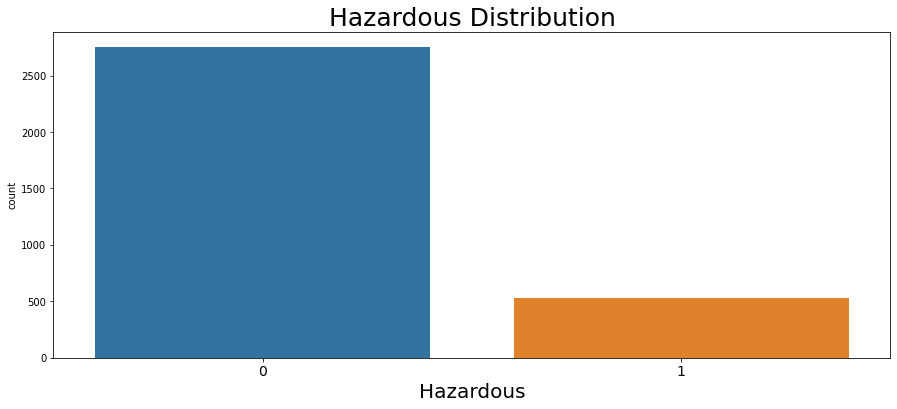

In [26]:
plt.figure(figsize=(15,6))
_=sns.countplot(train['hazardous'],order=train['hazardous'].value_counts().index)
_=plt.title("Hazardous Distribution",fontsize=25)
_=plt.xlabel('Hazardous',fontsize=20)
_=plt.xticks(fontsize=14)

In [ ]:
train['hazardous'].value_counts()

0    2752
1     528
Name: Hazardous, dtype: int64

#### The above bar chart explains that there is a class imbalance between target labels.


### Let's create a XGboost classifier model with optuna hyperparemeter optimization.

### Import Necessary Packages

In [28]:
from sklearn.model_selection import  cross_val_score,KFold,train_test_split,RepeatedStratifiedKFold,StratifiedKFold,learning_curve
from catboost import CatBoostClassifier,Pool,cv,monoforest
import optuna
from optuna.samplers import RandomSampler,TPESampler,MOTPESampler,CmaEsSampler
from sklearn.metrics import f1_score,classification_report,confusion_matrix,roc_auc_score,accuracy_score
from xgboost import XGBClassifier,plot_tree
import xgboost as xgb
from optuna.integration import XGBoostPruningCallback,LightGBMPruningCallback
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
import lightgbm as lgbm
import math

### Split predictor and target variables.

In [20]:
for i ,col in enumerate(train.columns):
  print(f"{i}_{col}")

0_absolute_magnitude
1_est_dia_in_km(min)
2_est_dia_in_km(max)
3_est_dia_in_m(min)
4_est_dia_in_m(max)
5_est_dia_in_miles(min)
6_est_dia_in_miles(max)
7_est_dia_in_feet(min)
8_est_dia_in_feet(max)
9_relative_velocity_km_per_sec
10_relative_velocity_km_per_hr
11_miles_per_hour
12_miss_dist_(astronomical)
13_miss_dist_(lunar)
14_miss_dist_(kilometers)
15_miss_dist_(miles)
16_orbit_id
17_orbit_uncertainity
18_minimum_orbit_intersection
19_jupiter_tisserand_invariant
20_epoch_osculation
21_eccentricity
22_semi_major_axis
23_inclination
24_asc_node_longitude
25_orbital_period
26_perihelion_distance
27_perihelion_arg
28_aphelion_dist
29_perihelion_time
30_mean_anomaly
31_mean_motion
32_hazardous
33_absolute_magnitude_min
34_absolute_magnitude_ptp
35_absolute_magnitude_median
36_absolute_magnitude_max
37_est_dia_in_km(min)_min
38_est_dia_in_km(min)_ptp
39_est_dia_in_km(min)_median
40_est_dia_in_km(min)_max
41_est_dia_in_km(max)_min
42_est_dia_in_km(max)_ptp
43_est_dia_in_km(max)_median
44_est

In [11]:
X=train.iloc[:,np.r_[0:32,33:156]]
y=train['hazardous']

### Define XGboost model.

In [ ]:
def objective(trial):
  skf = StratifiedKFold(n_splits=10,random_state=2000,shuffle=True)
  for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    param = {
        "verbosity": 1,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": trial.suggest_categorical("tree_method",['exact', 'approx', 'hist']),
        "eta": trial.suggest_float("eta", 0.000001, 1.0),

        #'interaction_constraints':[[2,3,8,12],[12,13,14],[5,6,9,12]],
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.1, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),

        "n_estimators":trial.suggest_categorical("n_estimators",[200,400,600,800,1000])
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 2, 30)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 60)
        
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation_0-error")
    xgb_clf=XGBClassifier(early_stopping_rounds=50,
                               
                              **param)
    xgb_clf.fit(X_train,y_train,
               eval_set=[(X_valid, y_valid)],
            eval_metric='error',
            early_stopping_rounds=200,
            callbacks=[pruning_callback],
           
             )
    preds = np.clip(xgb_clf.predict_proba(X_valid)[:,1],a_min=0.0,a_max=1.0)
    accuracy = roc_auc_score(y_valid, preds)
    return accuracy


if __name__ == "__main__":
    study1 = optuna.create_study(direction='maximize',sampler=MOTPESampler(),
           pruner=optuna.pruners.SuccessiveHalvingPruner())
    study1.optimize(objective, n_trials=100)
    print('Number of finished trials:', len(study1.trials))
    print('Best trial:', study1.best_trial.params)  

In [31]:
study1.best_value

0.9999303232998885

In [32]:
study1.best_params


{'alpha': 0.0036922728497754864,
 'booster': 'dart',
 'colsample_bytree': 0.95814251163105,
 'eta': 0.5667229755182016,
 'gamma': 3.221822994545585e-07,
 'grow_policy': 'lossguide',
 'lambda': 0.004851735453398697,
 'max_depth': 23,
 'min_child_weight': 41,
 'n_estimators': 800,
 'normalize_type': 'tree',
 'rate_drop': 5.244593080019435e-06,
 'sample_type': 'weighted',
 'skip_drop': 1.9311103756601274e-07,
 'subsample': 0.19771558989788213,
 'tree_method': 'exact'}

### Visualizing the Optimization History - Explains the best score at each trails.

In [34]:
optuna.visualization.plot_optimization_history(study1)

### Visualizing High-dimensional Parameter Relationships

In [35]:
optuna.visualization.plot_slice(study1)

### Visualizing Parameter Importances

In [36]:
optuna.visualization.plot_param_importances(study1)

### Creat model with tuned parameters

In [57]:
xgb_clf = XGBClassifier(early_stopping_rounds=200,**study1.best_params,verbose=1)

### Fit the model

In [58]:
xgb_clf.fit(X,y,eval_metric='error')

XGBClassifier(alpha=0.0036922728497754864, booster='dart',
              colsample_bytree=0.95814251163105, early_stopping_rounds=200,
              eta=0.5667229755182016, gamma=3.221822994545585e-07,
              grow_policy='lossguide', lambda=0.004851735453398697,
              max_depth=23, min_child_weight=41, n_estimators=800,
              normalize_type='tree', rate_drop=5.244593080019435e-06,
              sample_type='weighted', skip_drop=1.9311103756601274e-07,
              subsample=0.19771558989788213, tree_method='exact', verbose=1)

### Shap explainer not supporting dart tree so lets use gbtree instead.

In [59]:
param={'alpha': 0.0036922728497754864,
 'booster': 'gbtree',
 'colsample_bytree': 0.95814251163105,
 'eta': 0.5667229755182016,
 'gamma': 3.221822994545585e-07,
 'grow_policy': 'lossguide',
 'lambda': 0.004851735453398697,
 'max_depth': 23,
 'min_child_weight': 41,
 'n_estimators': 800,
 'normalize_type': 'tree',
 'rate_drop': 5.244593080019435e-06,
 'sample_type': 'weighted',
 'skip_drop': 1.9311103756601274e-07,
 'subsample': 0.19771558989788213,
 'tree_method': 'exact'}

In [60]:
xgb_clf1 = XGBClassifier(early_stopping_rounds=200,**param,verbose=2,)
xgb_clf1.fit(X,y,eval_metric='error')

XGBClassifier(alpha=0.0036922728497754864, colsample_bytree=0.95814251163105,
              early_stopping_rounds=200, eta=0.5667229755182016,
              gamma=3.221822994545585e-07, grow_policy='lossguide',
              lambda=0.004851735453398697, max_depth=23, min_child_weight=41,
              n_estimators=800, normalize_type='tree',
              rate_drop=5.244593080019435e-06, sample_type='weighted',
              skip_drop=1.9311103756601274e-07, subsample=0.19771558989788213,
              tree_method='exact', verbose=2)

### Import shap for model explaination

In [ ]:
!pip install -q shap

In [45]:
import shap

In [61]:
explainer = shap.TreeExplainer(xgb_clf1)
shap_values = explainer.shap_values(X, y)

### Feature importance plot.

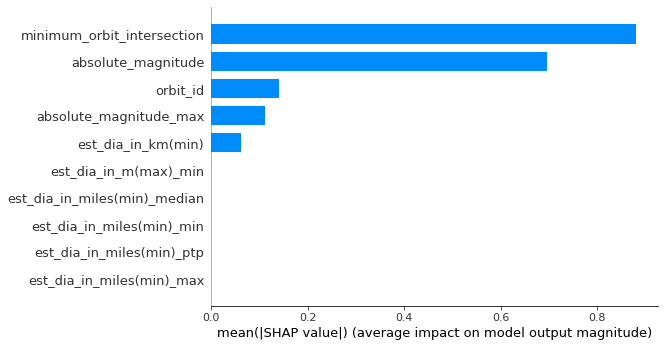

In [70]:
shap.summary_plot(shap_values, X, plot_type="bar",
                  max_display=10)

### Top features impact the model

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_display)

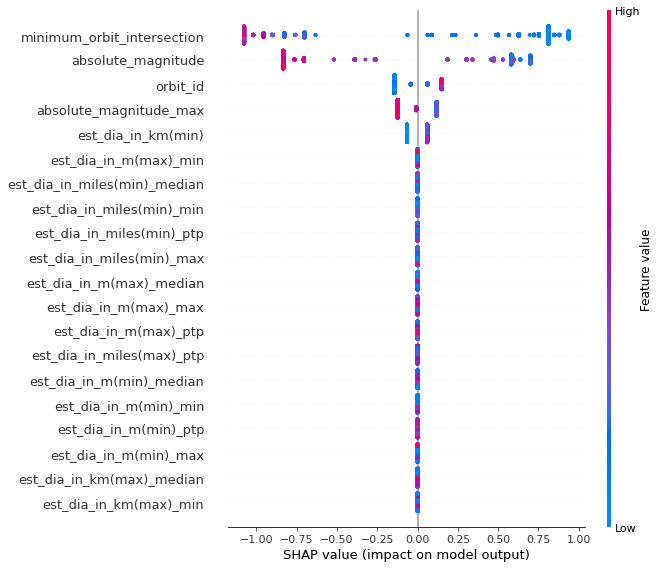

In [72]:
shap.summary_plot(shap_values, X)

### Let's see which feature influences the model prediction for a single observation in each class. 

In [ ]:
shap.initjs()

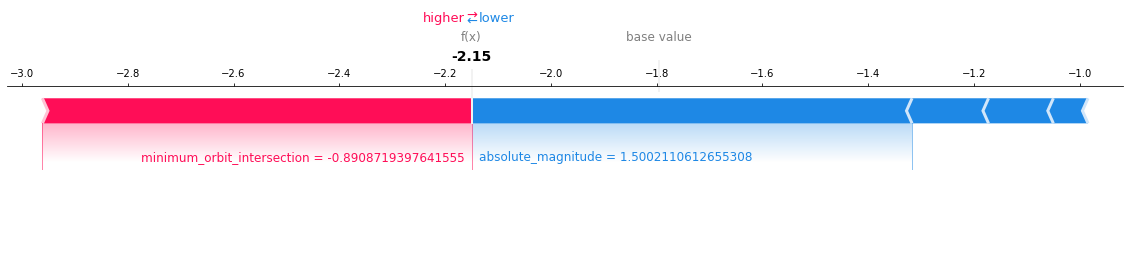

In [78]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:],matplotlib=True)

In [82]:
pred=xgb_clf1.predict_proba(test.loc[:,X.columns])[:,1]

In [ ]:
res=pd.DataFrame({'Hazardous':pred})

In [ ]:
res.to_csv("XGboost_Classifier_with_optuna_tuning.csv",index=False)